In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [149]:
incomes = pd.read_csv("../../data/curated/income_by_sa2.csv")
population = pd.read_csv("../../data/curated/population_by_sa2.csv")
properties = pd.read_csv("../../data/curated/AllProperties.csv")

In [150]:
properties['Suburb'] = properties['Suburb'].str.split('-')
properties = properties.explode('Suburb')
properties.rename(columns={'Suburb':'Label'}, inplace=True)
properties


,Label,2000 Mar Count,2000 Mar Median,2000 Jun Count,2000 Jun Median,2000 Sep Count,2000 Sep Median,2000 Dec Count,2000 Dec Median,2001 Mar Count,...,2022 Mar Count,2022 Mar Median,2022 Jun Count,2022 Jun Median,2022 Sep Count,2022 Sep Median,2022 Dec Count,2022 Dec Median,2023 Mar Count,2023 Mar Median
0,Albert Park,1143,260,1134,260,1177,270,1178,275,1208,...,867,500,855,515,881,500,832,525,786,545
0,Middle Park,1143,260,1134,260,1177,270,1178,275,1208,...,867,500,855,515,881,500,832,525,786,545
0,West St Kilda,1143,260,1134,260,1177,270,1178,275,1208,...,867,500,855,515,881,500,832,525,786,545
1,Armadale,733,200,737,200,738,205,739,210,718,...,805,430,851,450,852,450,840,460,751,490
2,Carlton North,864,260,814,260,799,265,736,270,718,...,581,580,535,595,547,600,546,600,490,620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Traralgon,851,125,823,120,831,125,807,125,796,...,895,360,871,380,898,380,904,380,903,385
142,Wanagaratta,705,125,671,125,631,130,623,130,602,...,531,370,530,380,547,380,541,380,518,380
143,Warragul,385,130,367,135,382,135,366,135,365,...,522,400,512,400,515,420,523,430,497,440
144,Warrnambool,1266,130,1229,135,1204,135,1135,135,1069,...,854,400,844,400,870,420,859,420,867,420


In [151]:
# Drop unnecessary columns in the properties dataframe
property_columns = list(properties.columns)

cols_to_keep = []
cols_to_keep.append(property_columns[0])
cols_to_keep = cols_to_keep + property_columns[-58:]

properties = properties[cols_to_keep]
properties


,Label,2016 Mar Count,2016 Mar Median,2016 Jun Count,2016 Jun Median,2016 Sep Count,2016 Sep Median,2016 Dec Count,2016 Dec Median,2017 Mar Count,...,2022 Mar Count,2022 Mar Median,2022 Jun Count,2022 Jun Median,2022 Sep Count,2022 Sep Median,2022 Dec Count,2022 Dec Median,2023 Mar Count,2023 Mar Median
0,Albert Park,961,520,970,500,971,520,921,520,910,...,867,500,855,515,881,500,832,525,786,545
0,Middle Park,961,520,970,500,971,520,921,520,910,...,867,500,855,515,881,500,832,525,786,545
0,West St Kilda,961,520,970,500,971,520,921,520,910,...,867,500,855,515,881,500,832,525,786,545
1,Armadale,653,400,659,400,673,400,660,410,681,...,805,430,851,450,852,450,840,460,751,490
2,Carlton North,544,530,544,530,529,520,509,530,501,...,581,580,535,595,547,600,546,600,490,620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Traralgon,1119,270,1127,270,1122,270,1118,270,1129,...,895,360,871,380,898,380,904,380,903,385
142,Wanagaratta,761,260,740,260,734,260,719,260,717,...,531,370,530,380,547,380,541,380,518,380
143,Warragul,502,290,505,290,490,295,479,300,488,...,522,400,512,400,515,420,523,430,497,440
144,Warrnambool,1409,290,1422,290,1401,285,1406,290,1390,...,854,400,844,400,870,420,859,420,867,420


In [152]:
i = 1
while i < len(cols_to_keep)-8:
    avg_count = (properties[cols_to_keep[i]] + properties[cols_to_keep[i+2]] + properties[cols_to_keep[i+4]] + properties[cols_to_keep[i+6]]) / 4
    avg_median = (properties[cols_to_keep[i+1]] + properties[cols_to_keep[i+3]] + properties[cols_to_keep[i+5]] + properties[cols_to_keep[i+7]]) / 4

    properties[f'{cols_to_keep[i][0:4]}_avg_count'] = avg_count
    properties[f'{cols_to_keep[i][0:4]}_avg_median'] = avg_median

    '''print(f'Year {cols_to_keep[i]}')
    print(avg_count)
    print(avg_median)'''
    i += 8

properties.rename(columns={'2023 Mar Count': '2023_avg_count'}, inplace=True)
properties.rename(columns={'2023 Mar Median': '2023_avg_median'}, inplace=True)

/tmp/ipykernel_2117/3781582355.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties[f'{cols_to_keep[i][0:4]}_avg_count'] = avg_count
/tmp/ipykernel_2117/3781582355.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties[f'{cols_to_keep[i][0:4]}_avg_median'] = avg_median
/tmp/ipykernel_2117/3781582355.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [153]:
properties_yearly = properties[['Label', '2016_avg_count', '2016_avg_median', '2017_avg_count', '2017_avg_median', '2018_avg_count', '2018_avg_median', '2019_avg_count', '2019_avg_median', '2020_avg_count', '2020_avg_median', '2021_avg_count', '2021_avg_median', '2022_avg_count', '2022_avg_median','2023_avg_count', '2023_avg_median']]

In [154]:
# Keep only even numbered columns in the properties dataframe
even_cols = [col for idx, col in enumerate(properties_yearly.columns) if idx % 2 == 0]
properties_even = properties_yearly[even_cols]
properties_even

,Label,2016_avg_median,2017_avg_median,2018_avg_median,2019_avg_median,2020_avg_median,2021_avg_median,2022_avg_median,2023_avg_median
0,Albert Park,515.00,527.75,562.50,568.00,570.00,498.75,510.00,545
0,Middle Park,515.00,527.75,562.50,568.00,570.00,498.75,510.00,545
0,West St Kilda,515.00,527.75,562.50,568.00,570.00,498.75,510.00,545
1,Armadale,402.50,445.00,487.50,481.25,498.75,433.75,447.50,490
2,Carlton North,527.50,545.00,566.25,579.25,588.75,577.50,593.75,620
...,...,...,...,...,...,...,...,...,...
141,Traralgon,270.00,276.25,278.75,287.50,307.50,345.00,375.00,385
142,Wanagaratta,260.00,266.25,274.25,287.50,299.50,340.00,377.50,380
143,Warragul,293.75,305.00,323.75,347.00,360.00,383.75,412.50,440
144,Warrnambool,288.75,290.00,300.00,322.50,342.50,365.00,410.00,420


In [155]:
# Merge the data
data = pd.merge(incomes, population, on='Label')
data = pd.merge(data, properties_even, on='Label')


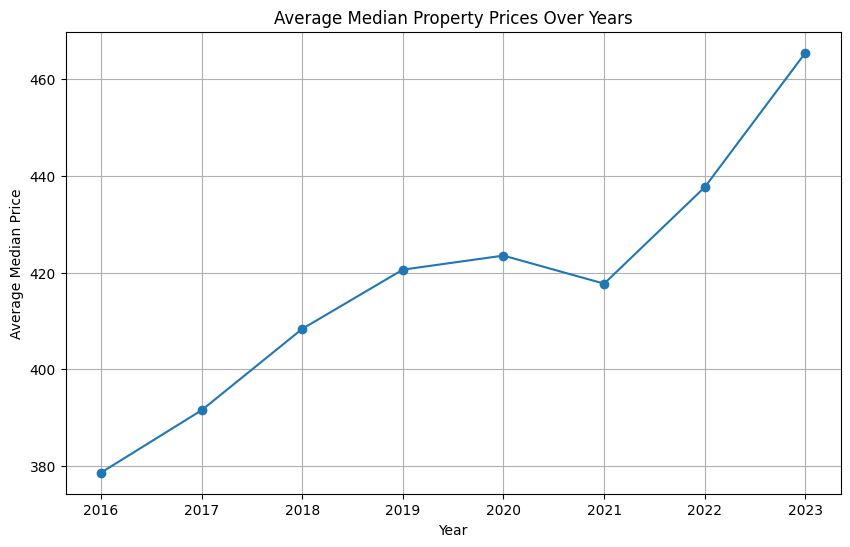

In [156]:
mean_2016 = data['2016_avg_median'].mean()
mean_2017 = data['2017_avg_median'].mean()
mean_2018 = data['2018_avg_median'].mean()
mean_2019 = data['2019_avg_median'].mean()
mean_2020 = data['2020_avg_median'].mean()
mean_2021 = data['2021_avg_median'].mean()
mean_2022 = data['2022_avg_median'].mean()
mean_2023 = data['2023_avg_median'].mean()

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
means = [mean_2016, mean_2017, mean_2018, mean_2019, mean_2020, mean_2021, mean_2022, mean_2023]

plt.figure(figsize=(10, 6))
plt.plot(years, means, marker='o')
plt.title('Average Median Property Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Average Median Price')
plt.grid(True)
plt.show()

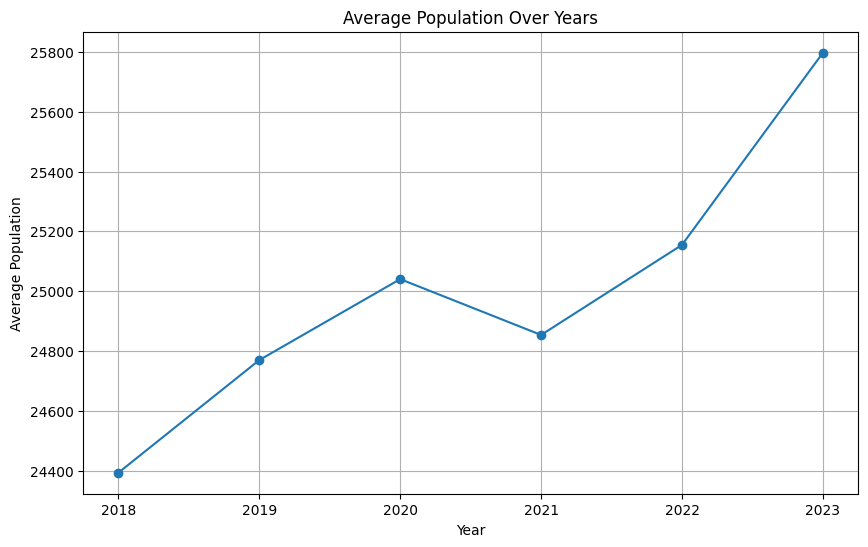

In [157]:
pop_2018 = data['estimated_population_2018'].mean()
pop_2019 = data['estimated_population_2019'].mean()
pop_2020 = data['estimated_population_2020'].mean()
pop_2021 = data['estimated_population_2021'].mean()
pop_2022 = data['estimated_population_2022'].mean()
pop_2023 = data['estimated_population_2023'].mean()

years = ['2018', '2019', '2020', '2021', '2022', '2023']
populations = [pop_2018, pop_2019, pop_2020, pop_2021, pop_2022, pop_2023]

plt.figure(figsize=(10, 6))
plt.plot(years, populations, marker='o')
plt.title('Average Population Over Years')
plt.xlabel('Year')
plt.ylabel('Average Population')
plt.grid(True)
plt.show()


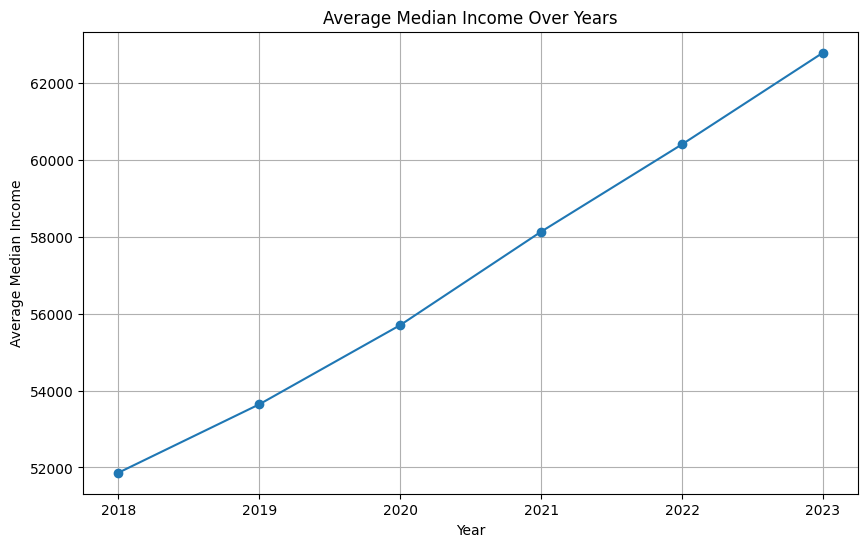

In [158]:
income_2018 = data['median_income_2018'].mean()
income_2019 = data['median_income_2019'].mean()
income_2020 = data['median_income_2020'].mean()
income_2021 = data['median_income_2021'].mean()
income_2022 = data['median_income_2022'].mean()
income_2023 = data['median_income_2023'].mean()

years = ['2018', '2019', '2020', '2021', '2022', '2023']
incomes = [income_2018, income_2019, income_2020, income_2021, income_2022, income_2023]

plt.figure(figsize=(10, 6))
plt.plot(years, incomes, marker='o')
plt.title('Average Median Income Over Years')
plt.xlabel('Year')
plt.ylabel('Average Median Income')
plt.grid(True)
plt.show()


In [159]:
years = ['2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025','2026']
suburbs = data['Label'].unique()

population_long = population.melt(id_vars=['Label'], var_name='Year', value_name='Population')
population_long['Year'] = population_long['Year'].str.extract('(\d{4})')
population_long

incomes_long = data.melt(id_vars=['Label'], value_vars=[f'median_income_{year}' for year in years], var_name='Year', value_name='Income')
incomes_long['Year'] = incomes_long['Year'].str.extract('(\d{4})')

properties_long = properties_even.melt(id_vars=['Label'], var_name='Year', value_name='Median_Price')
properties_long['Year'] = properties_long['Year'].str.extract('(\d{4})')

population_long
incomes_long
properties_long


,Label,Year,Median_Price
0,Albert Park,2016,515.0
1,Middle Park,2016,515.0
2,West St Kilda,2016,515.0
3,Armadale,2016,402.5
4,Carlton North,2016,527.5
...,...,...,...
1715,Traralgon,2023,385.0
1716,Wanagaratta,2023,380.0
1717,Warragul,2023,440.0
1718,Warrnambool,2023,420.0


In [239]:
data_long = pd.merge(population_long, incomes_long, on=['Label', 'Year'])
data_long = pd.merge(data_long, properties_long, on=['Label', 'Year'])

data_long = data_long.sort_values(by=['Label', 'Year'])
data_long

data_long_test = pd.merge(population_long, incomes_long, on=['Label', 'Year'])
data_long_test = data_long_test.sort_values(by=['Label', 'Year'])
data_long_test = data_long_test[~data_long_test['Year'].isin(['2018', '2019', '2020', '2021','2022'])]

In [240]:
# Create lagged features
data_long['Lagged Income'] = data_long.groupby('Label')['Income'].shift(1)
data_long['Lagged Population'] = data_long.groupby('Label')['Population'].shift(1)
data_long['Lagged Median_Price'] = data_long.groupby('Label')['Median_Price'].shift(1)

data_long_test['Lagged Income'] = data_long_test.groupby('Label')['Income'].shift(1)
data_long_test['Lagged Population'] = data_long_test.groupby('Label')['Population'].shift(1)

data_long['Income Growth'] = (data_long['Income'] - data_long['Lagged Income']) / data_long['Lagged Income']
data_long['Population Growth'] = (data_long['Population'] - data_long['Lagged Population']) / data_long['Lagged Population']
data_long['Median_Price Growth'] = (data_long['Median_Price'] - data_long['Lagged Median_Price']) / data_long['Lagged Median_Price']

data_long_test['Income Growth'] = (data_long_test['Income'] - data_long_test['Lagged Income']) / data_long_test['Lagged Income']
data_long_test['Population Growth'] = (data_long_test['Population'] - data_long_test['Lagged Population']) / data_long_test['Lagged Population']

# Imputation for missing values

# Calculate average lagged feature change for each label
data_long['Avg Income Change'] = data_long.groupby('Label')['Lagged Income'].transform(lambda x: x.diff().mean())
data_long['Avg Population Change'] = data_long.groupby('Label')['Lagged Population'].transform(lambda x: x.diff().mean())
data_long['Avg Median_Price Change'] = data_long.groupby('Label')['Lagged Median_Price'].transform(lambda x: x.diff().mean())
data_long['Avg Income Growth'] = data_long.groupby('Label')['Income Growth'].transform(lambda x: x.mean())
data_long['Avg Population Growth'] = data_long.groupby('Label')['Population Growth'].transform(lambda x: x.mean())
data_long['Avg Median_Price Growth'] = data_long.groupby('Label')['Median_Price Growth'].transform(lambda x: x.mean())

data_long_test['Avg Income Change'] = data_long_test.groupby('Label')['Lagged Income'].transform(lambda x: x.diff().mean())
data_long_test['Avg Population Change'] = data_long_test.groupby('Label')['Lagged Population'].transform(lambda x: x.diff().mean())
data_long_test['Avg Income Growth'] = data_long_test.groupby('Label')['Income Growth'].transform(lambda x: x.mean())
data_long_test['Avg Population Growth'] = data_long_test.groupby('Label')['Population Growth'].transform(lambda x: x.mean())

# Fill missing values with average change
data_long['Income Growth'] = data_long['Income Growth'].fillna(data_long['Avg Income Growth'])
data_long['Population Growth'] = data_long['Population Growth'].fillna(data_long['Avg Population Growth'])
data_long['Median_Price Growth'] = data_long['Median_Price Growth'].fillna(data_long['Avg Median_Price Growth'])

data_long['Lagged Income'] = data_long['Lagged Income'].fillna(data_long['Income'] - data_long['Avg Income Change'])
data_long['Lagged Population'] = data_long['Lagged Population'].fillna(data_long['Population'] - data_long['Avg Population Change'])
data_long['Lagged Median_Price'] = data_long['Lagged Median_Price'].fillna(data_long['Median_Price'] - data_long['Avg Median_Price Change'])

data_long_test = data_long_test[data_long_test['Year'] != '2023']

# Merge data_long and data_long_test
data_long_all = pd.concat([data_long, data_long_test])
data_long_all = data_long_all.sort_values(by=['Label', 'Year'])
data_long_all_encoded = pd.get_dummies(data_long_all, columns=['Label', 'Year'])
'''data_long_encoded = pd.get_dummies(data_long, columns=['Label', 'Year'])
data_long_encoded_test = pd.get_dummies(data_long_test, columns=['Label', 'Year'])'''

"data_long_encoded = pd.get_dummies(data_long, columns=['Label', 'Year'])\ndata_long_encoded_test = pd.get_dummies(data_long_test, columns=['Label', 'Year'])"

In [241]:
# Split data_long_encoded into train and test sets
data_long_all_encoded_train = data_long_all_encoded.dropna()
data_long_all_encoded_test = data_long_all_encoded[data_long_all_encoded.isna().any(axis=1)]

In [202]:
data_long_all_encoded_test

,Population,Income,Median_Price,Lagged Income,Lagged Population,Lagged Median_Price,Income Growth,Population Growth,Median_Price Growth,Avg Income Change,...,Label_Yarraville,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,Year_2025,Year_2026
546,10527.676824,77788.073345,NaN,74636.644356,10008.000000,NaN,0.042224,0.051926,NaN,2895.519978,...,False,False,False,False,False,False,False,True,False,False
637,10914.578045,80427.684311,NaN,77788.073345,10527.676824,NaN,0.033933,0.036751,NaN,2895.519978,...,False,False,False,False,False,False,False,False,True,False
728,11189.069984,83781.391430,NaN,80427.684311,10914.578045,NaN,0.041698,0.025149,NaN,2895.519978,...,False,False,False,False,False,False,False,False,False,True
547,17665.062455,80239.921519,NaN,77000.919533,16861.000000,NaN,0.042064,0.047688,NaN,3027.336527,...,False,False,False,False,False,False,False,True,False,False
638,18280.665009,83055.592588,NaN,80239.921519,17665.062455,NaN,0.035091,0.034849,NaN,3027.336527,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,17519.990001,81302.131284,NaN,78219.736136,17090.461962,NaN,0.039407,0.025133,NaN,3110.810248,...,False,False,False,False,False,False,False,False,True,False
817,17870.295152,84309.315494,NaN,81302.131284,17519.990001,NaN,0.036988,0.019995,NaN,3110.810248,...,False,False,False,False,False,False,False,False,False,True
636,16523.217961,84431.867671,NaN,81342.059481,16020.000000,NaN,0.037985,0.031412,NaN,3176.985675,...,True,False,False,False,False,False,False,True,False,False
727,16987.482063,87696.030832,NaN,84431.867671,16523.217961,NaN,0.038660,0.028098,NaN,3176.985675,...,True,False,False,False,False,False,False,False,True,False


In [242]:
# Lasso Regression Model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X = data_long_all_encoded_train.drop(columns=['Median_Price','Lagged Median_Price','Median_Price Growth','Avg Median_Price Growth','Avg Median_Price Change'])
y = data_long_all_encoded_train['Median_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_mse

np.float64(671.5486365123393)

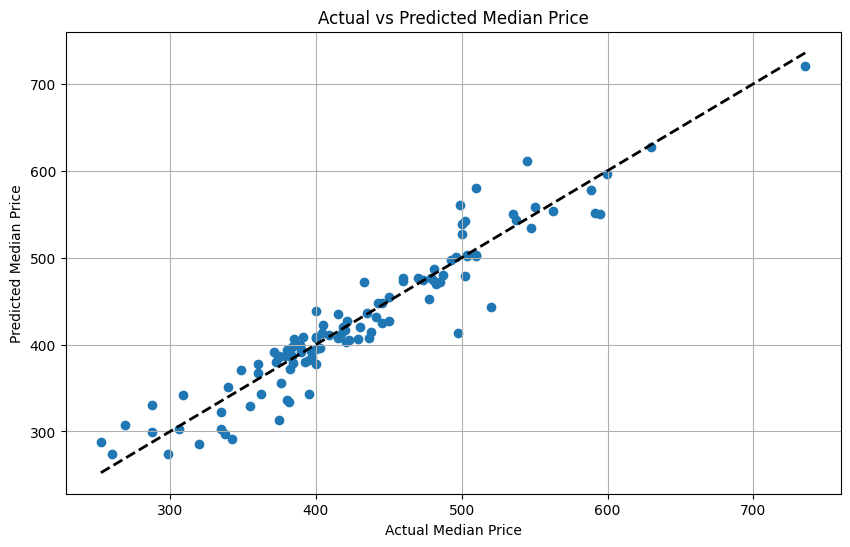

In [243]:
# Graph the predicted vs actual median prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Median Price')
plt.ylabel('Predicted Median Price')
plt.title('Actual vs Predicted Median Price')
plt.grid(True)
# Plot the y=x line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [244]:
data_long_all_encoded_test

,Population,Income,Median_Price,Lagged Income,Lagged Population,Lagged Median_Price,Income Growth,Population Growth,Median_Price Growth,Avg Income Change,...,Label_Yarraville,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,Year_2025,Year_2026
546,10527.676824,77788.073345,NaN,74636.644356,10008.000000,NaN,0.042224,0.051926,NaN,2895.519978,...,False,False,False,False,False,False,False,True,False,False
637,10914.578045,80427.684311,NaN,77788.073345,10527.676824,NaN,0.033933,0.036751,NaN,2895.519978,...,False,False,False,False,False,False,False,False,True,False
728,11189.069984,83781.391430,NaN,80427.684311,10914.578045,NaN,0.041698,0.025149,NaN,2895.519978,...,False,False,False,False,False,False,False,False,False,True
547,17665.062455,80239.921519,NaN,77000.919533,16861.000000,NaN,0.042064,0.047688,NaN,3027.336527,...,False,False,False,False,False,False,False,True,False,False
638,18280.665009,83055.592588,NaN,80239.921519,17665.062455,NaN,0.035091,0.034849,NaN,3027.336527,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,17519.990001,81302.131284,NaN,78219.736136,17090.461962,NaN,0.039407,0.025133,NaN,3110.810248,...,False,False,False,False,False,False,False,False,True,False
817,17870.295152,84309.315494,NaN,81302.131284,17519.990001,NaN,0.036988,0.019995,NaN,3110.810248,...,False,False,False,False,False,False,False,False,False,True
636,16523.217961,84431.867671,NaN,81342.059481,16020.000000,NaN,0.037985,0.031412,NaN,3176.985675,...,True,False,False,False,False,False,False,True,False,False
727,16987.482063,87696.030832,NaN,84431.867671,16523.217961,NaN,0.038660,0.028098,NaN,3176.985675,...,True,False,False,False,False,False,False,False,True,False


In [245]:
# Predicting Median Prices for 2024,2025,2026
X_test = data_long_all_encoded_test.drop(columns=['Median_Price','Lagged Median_Price','Median_Price Growth','Avg Median_Price Growth','Avg Median_Price Change'])
X_test_scaled = scaler.transform(X_test)
y_test = lasso.predict(X_test_scaled)

# Add the predicted median prices to the data_long_all_encoded_test dataframe
data_long_all_encoded_test['Median_Price'] = y_test

/tmp/ipykernel_2117/332368323.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long_all_encoded_test['Median_Price'] = y_test


In [246]:
# Decode the 'Year' columns back to their original form
data_long_all_encoded_test['Year'] = data_long_all_encoded_test.filter(like='Year_').idxmax(axis=1).str.replace('Year_', '')
data_long_all_encoded_test['Label'] = data_long_all_encoded_test.filter(like='Label_').idxmax(axis=1).str.replace('Label_', '')
# Drop the encoded columns
encoded_columns = data_long_all_encoded_test.filter(like='Label_').columns.tolist() + data_long_all_encoded_test.filter(like='Year_').columns.tolist()
data_long_all_encoded_test.drop(columns=encoded_columns, inplace=True)
data_long_all_encoded_test



/tmp/ipykernel_2117/2152552872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long_all_encoded_test['Year'] = data_long_all_encoded_test.filter(like='Year_').idxmax(axis=1).str.replace('Year_', '')
/tmp/ipykernel_2117/2152552872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long_all_encoded_test['Label'] = data_long_all_encoded_test.filter(like='Label_').idxmax(axis=1).str.replace('Label_', '')
/tmp/ipykernel_2117/2152552872.py:6: SettingWithCopyWarning: 
A value is trying to be set on 

,Population,Income,Median_Price,Lagged Income,Lagged Population,Lagged Median_Price,Income Growth,Population Growth,Median_Price Growth,Avg Income Change,Avg Population Change,Avg Median_Price Change,Avg Income Growth,Avg Population Growth,Avg Median_Price Growth,Year,Label
546,10527.676824,77788.073345,473.299972,74636.644356,10008.000000,NaN,0.042224,0.051926,NaN,2895.519978,453.289022,NaN,0.039285,0.037942,NaN,2024,Abbotsford
637,10914.578045,80427.684311,471.875016,77788.073345,10527.676824,NaN,0.033933,0.036751,NaN,2895.519978,453.289022,NaN,0.039285,0.037942,NaN,2025,Abbotsford
728,11189.069984,83781.391430,471.932113,80427.684311,10914.578045,NaN,0.041698,0.025149,NaN,2895.519978,453.289022,NaN,0.039285,0.037942,NaN,2026,Abbotsford
547,17665.062455,80239.921519,611.166812,77000.919533,16861.000000,NaN,0.042064,0.047688,NaN,3027.336527,709.832504,NaN,0.038866,0.035283,NaN,2024,Albert Park
638,18280.665009,83055.592588,609.964489,80239.921519,17665.062455,NaN,0.035091,0.034849,NaN,3027.336527,709.832504,NaN,0.038866,0.035283,NaN,2025,Albert Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,17519.990001,81302.131284,558.379812,78219.736136,17090.461962,NaN,0.039407,0.025133,NaN,3110.810248,466.995001,NaN,0.039402,0.025181,NaN,2025,Williamstown
817,17870.295152,84309.315494,557.928878,81302.131284,17519.990001,NaN,0.036988,0.019995,NaN,3110.810248,466.995001,NaN,0.039402,0.025181,NaN,2026,Williamstown
636,16523.217961,84431.867671,489.091678,81342.059481,16020.000000,NaN,0.037985,0.031412,NaN,3176.985675,483.741032,NaN,0.038678,0.027331,NaN,2024,Yarraville
727,16987.482063,87696.030832,488.982533,84431.867671,16523.217961,NaN,0.038660,0.028098,NaN,3176.985675,483.741032,NaN,0.038678,0.027331,NaN,2025,Yarraville


In [276]:
# Move Label and Year columns to the front
cols = data_long_all_encoded_test.columns.tolist()
cols = cols[-2:] + cols[:-2]
data_long_all_encoded_test = data_long_all_encoded_test[cols]
data_long_preds = data_long_all_encoded_test

# Keep only columns that are shared between data_long and data_long_preds
shared_columns = data_long.columns.intersection(data_long_preds.columns)
data_long_preds = data_long_preds[shared_columns]

# Add data_long_preds to data_long by row
data_long_final = pd.concat([data_long, data_long_preds], ignore_index=True)



'''
# Top 10 suburbs with the highest median prices in 2024, 2025, and 2026
data_long_all_encoded_test_2024 = data_long_all_encoded_test[data_long_all_encoded_test['Year'] == '2024']
data_long_all_encoded_test_2025 = data_long_all_encoded_test[data_long_all_encoded_test['Year'] == '2025']
data_long_all_encoded_test_2026 = data_long_all_encoded_test[data_long_all_encoded_test['Year'] == '2026']




top_10_2024 = data_long_all_encoded_test_2024.sort_values(by='Median_Price', ascending=False).head(10)
top_10_2025 = data_long_all_encoded_test_2025.sort_values(by='Median_Price', ascending=False).head(10)
top_10_2026 = data_long_all_encoded_test_2026.sort_values(by='Median_Price', ascending=False).head(10)

# Keep only Year, Label, Population, Income, Median_Price columns
columns_to_keep = ['Year', 'Label', 'Population', 'Income', 'Median_Price']
top_10_2024 = top_10_2024[columns_to_keep]
top_10_2025 = top_10_2025[columns_to_keep]
top_10_2026 = top_10_2026[columns_to_keep]

top_10_2024
top_10_2025
top_10_2026'''


"\n# Top 10 suburbs with the highest median prices in 2024, 2025, and 2026\ndata_long_all_encoded_test_2024 = data_long_all_encoded_test[data_long_all_encoded_test['Year'] == '2024']\ndata_long_all_encoded_test_2025 = data_long_all_encoded_test[data_long_all_encoded_test['Year'] == '2025']\ndata_long_all_encoded_test_2026 = data_long_all_encoded_test[data_long_all_encoded_test['Year'] == '2026']\n\n\n\n\ntop_10_2024 = data_long_all_encoded_test_2024.sort_values(by='Median_Price', ascending=False).head(10)\ntop_10_2025 = data_long_all_encoded_test_2025.sort_values(by='Median_Price', ascending=False).head(10)\ntop_10_2026 = data_long_all_encoded_test_2026.sort_values(by='Median_Price', ascending=False).head(10)\n\n# Keep only Year, Label, Population, Income, Median_Price columns\ncolumns_to_keep = ['Year', 'Label', 'Population', 'Income', 'Median_Price']\ntop_10_2024 = top_10_2024[columns_to_keep]\ntop_10_2025 = top_10_2025[columns_to_keep]\ntop_10_2026 = top_10_2026[columns_to_keep]\n\n

In [283]:
data_long_final['Lagged Income'] = data_long_final.groupby('Label')['Income'].shift(1)
data_long_final['Lagged Population'] = data_long_final.groupby('Label')['Population'].shift(1)
data_long_final['Lagged Median_Price'] = data_long_final.groupby('Label')['Median_Price'].shift(1)

data_long_final['Median_Price Growth'] = (data_long_final['Median_Price'] - data_long_final['Lagged Median_Price']) / data_long_final['Lagged Median_Price']

# Calculate the change in Median Price from 2024-2026 in each suburb
data_long_final['Median_Price Change'] = data_long_final.groupby('Label')['Median_Price'].diff()

# Filter the data for the years 2024-2026
data_2024_2026 = data_long_final[data_long_final['Year'].isin(['2024', '2025', '2026'])]

# Calculate the change in Median Price from 2024-2026 for each suburb
median_price_change = data_2024_2026.groupby('Label')['Median_Price Change'].sum().reset_index()
median_price_change.rename(columns={'Median_Price Change': 'Total Median_Price Change 2024-2026'}, inplace=True)
median_price_change

'''
# Top 10 suburbs with the highest median price growth in 2024, 2025, and 2026
data_long_final_2024 = data_long_final[data_long_final['Year'] == '2024']
data_long_final_2025 = data_long_final[data_long_final['Year'] == '2025']
data_long_final_2026 = data_long_final[data_long_final['Year'] == '2026']

top_10_growth_2024 = data_long_final_2024.sort_values(by='Median_Price Growth', ascending=False).head(10)
top_10_growth_2025 = data_long_final_2025.sort_values(by='Median_Price Growth', ascending=False).head(10)
top_10_growth_2026 = data_long_final_2026.sort_values(by='Median_Price Growth', ascending=False).head(10)

# Drop irrelevant columns
columns_to_keep = ['Year', 'Label', 'Population', 'Income', 'Median_Price', 'Median_Price Growth']
top_10_growth_2024 = top_10_growth_2024[columns_to_keep]
top_10_growth_2025 = top_10_growth_2025[columns_to_keep]
top_10_growth_2026 = top_10_growth_2026[columns_to_keep]'''



"\n# Top 10 suburbs with the highest median price growth in 2024, 2025, and 2026\ndata_long_final_2024 = data_long_final[data_long_final['Year'] == '2024']\ndata_long_final_2025 = data_long_final[data_long_final['Year'] == '2025']\ndata_long_final_2026 = data_long_final[data_long_final['Year'] == '2026']\n\ntop_10_growth_2024 = data_long_final_2024.sort_values(by='Median_Price Growth', ascending=False).head(10)\ntop_10_growth_2025 = data_long_final_2025.sort_values(by='Median_Price Growth', ascending=False).head(10)\ntop_10_growth_2026 = data_long_final_2026.sort_values(by='Median_Price Growth', ascending=False).head(10)\n\n# Drop irrelevant columns\ncolumns_to_keep = ['Year', 'Label', 'Population', 'Income', 'Median_Price', 'Median_Price Growth']\ntop_10_growth_2024 = top_10_growth_2024[columns_to_keep]\ntop_10_growth_2025 = top_10_growth_2025[columns_to_keep]\ntop_10_growth_2026 = top_10_growth_2026[columns_to_keep]"

In [294]:
# Top 10 suburbs with the highest median price growth from 2024-2026
top_10_growth_2024_2026 = median_price_change.sort_values(by='Total Median_Price Change 2024-2026', ascending=False).head(10)
top_10_growth_2024_2026

# Bottom 10 suburbs with the lowest median price growth from 2024-2026
bottom_10_growth_2024_2026 = median_price_change.sort_values(by='Total Median_Price Change 2024-2026', ascending=True).head(10)


top_10_suburbs_data = data_long_final[data_long_final['Label'].isin(top_10_growth_2024_2026['Label'])]
top_10_suburbs_data = top_10_suburbs_data[['Year', 'Label', 'Population', 'Income', 'Median_Price', 'Median_Price Growth']]
top_10_suburbs_data[top_10_suburbs_data['Year'].isin(['2024', '2026'])]


,Year,Label,Population,Income,Median_Price,Median_Price Growth
549,2024,Albert Park,17665.062455,80239.921519,611.166812,0.121407
551,2026,Albert Park,18706.847174,86331.495226,609.747383,-0.000356
558,2024,Armadale,109278.935733,68375.766886,502.593633,0.025701
560,2026,Armadale,115653.092418,73885.745371,501.625013,-0.001198
600,2024,Broadmeadows,14946.306719,45330.054750,421.992661,0.068336
602,2026,Broadmeadows,15878.383364,48821.978427,419.736907,-0.001049
612,2024,Camberwell,22639.826958,73535.385040,523.054750,0.046109
614,2026,Camberwell,23916.755274,79254.771249,521.720907,-0.001433
636,2024,Dandenong North,23542.350309,56011.629532,410.675134,0.026688
638,2026,Dandenong North,24684.586761,60592.676342,409.708247,-0.001976


In [293]:
data_long_final = data_long_final.sort_values(by=['Label', 'Year'])
data_long_final

,Label,Year,Population,Income,Median_Price,Lagged Income,Lagged Population,Lagged Median_Price,Income Growth,Population Growth,Median_Price Growth,Avg Income Change,Avg Population Change,Avg Median_Price Change,Avg Income Growth,Avg Population Growth,Avg Median_Price Growth,Median_Price Change
0,Abbotsford,2018,9527.000000,59923.000000,477.500000,NaN,NaN,NaN,0.044974,0.010387,NaN,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067,NaN
1,Abbotsford,2019,9594.000000,61918.000000,495.000000,59923.000000,9527.000000,477.500000,0.033293,0.007033,0.036649,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067,17.500000
2,Abbotsford,2020,9672.000000,66091.000000,482.500000,61918.000000,9594.000000,495.000000,0.067396,0.008130,-0.025253,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067,-12.500000
3,Abbotsford,2021,9258.000000,69104.795585,435.000000,66091.000000,9672.000000,482.500000,0.045601,-0.042804,-0.098446,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067,-47.500000
4,Abbotsford,2022,9513.000000,71219.795864,463.750000,69104.795585,9258.000000,435.000000,0.030606,0.027544,0.066092,2824.198966,-3.500000,-3.4375,0.044974,0.010387,0.020067,28.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Yarraville,2022,15661.000000,78146.977115,475.000000,75150.947880,15651.000000,477.500000,0.039867,0.000639,-0.005236,2920.494279,-82.500000,2.8125,0.041227,0.000487,0.015623,-2.500000
545,Yarraville,2023,16020.000000,81342.059481,500.000000,78146.977115,15661.000000,475.000000,0.040886,0.022923,0.052632,2920.494279,-82.500000,2.8125,0.041227,0.000487,0.015623,25.000000
816,Yarraville,2024,16523.217961,84431.867671,489.091678,81342.059481,16020.000000,500.000000,0.037985,0.031412,-0.021817,3176.985675,483.741032,NaN,0.038678,0.027331,NaN,-10.908322
817,Yarraville,2025,16987.482063,87696.030832,488.982533,84431.867671,16523.217961,489.091678,0.038660,0.028098,-0.000223,3176.985675,483.741032,NaN,0.038678,0.027331,NaN,-0.109145
